<a href="https://colab.research.google.com/github/madhanmohans/Cross-Site-Scripting-Detection/blob/main/XSS_detection_%7C_Phase_1_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  

In [ ]:
df = pd.read_csv("/content/XSSDataset.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,Contains &lt,Contains &rt,Contains Script,Contains And,Contains Percentage,Contains BackSlash,Contains Plus,Contains Document,Contains Onerror,Contains DIV,...,Contains Space,Contains Break Line,Class,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,1,1,1,0,1,0,0,1,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,1,1,0,0,1,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,0,1,1,0,0,0,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,1,1,1,0,0,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,1,1,0,0,1,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.loc[:, ~df.columns.str.match('Unnamed')]

In [ ]:
df.head()

,Contains &lt,Contains &rt,Contains Script,Contains And,Contains Percentage,Contains BackSlash,Contains Plus,Contains Document,Contains Onerror,Contains DIV,...,Contains Underscore,Contains location,Contains Search,Contains &#,Contains Open Brace,Contains Close Brace,Contains tilde,Contains Space,Contains Break Line,Class
0,1,1,1,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,Malicious
1,1,1,1,1,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,Malicious
2,1,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,Malicious
3,1,1,1,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,Malicious
4,1,1,1,1,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,Malicious


In [ ]:
pd.isnull(df).sum()

Contains &lt                  2
Contains &rt                  2
Contains Script               2
Contains And                  2
Contains Percentage           2
Contains BackSlash            2
Contains Plus                 2
Contains Document             2
Contains Onerror              2
Contains DIV                  2
Contains iframe               2
Contains img                  2
Contains SRC                  2
Contains Var                  2
Contains Eval                 2
Contains href                 2
Contains Cookie               2
Contains Single Quote         2
Contains Question Mark        2
Contains Exclamation Mark     2
Contains HTTPS                2
Contains JS                   2
Contains Hash                 2
Contains Equal                2
Contains Open Parenthesis     2
Contains Close Parenthesis    2
Contains Asterisk             2
Contains Comma                2
Contains Hyphen               2
Contains At                   2
Contains Underscore           2
Contains

In [ ]:
df = df.dropna()

In [ ]:
pd.isnull(df).sum()

Contains &lt                  0
Contains &rt                  0
Contains Script               0
Contains And                  0
Contains Percentage           0
Contains BackSlash            0
Contains Plus                 0
Contains Document             0
Contains Onerror              0
Contains DIV                  0
Contains iframe               0
Contains img                  0
Contains SRC                  0
Contains Var                  0
Contains Eval                 0
Contains href                 0
Contains Cookie               0
Contains Single Quote         0
Contains Question Mark        0
Contains Exclamation Mark     0
Contains HTTPS                0
Contains JS                   0
Contains Hash                 0
Contains Equal                0
Contains Open Parenthesis     0
Contains Close Parenthesis    0
Contains Asterisk             0
Contains Comma                0
Contains Hyphen               0
Contains At                   0
Contains Underscore           0
Contains

In [ ]:
df['Contains &rt'].unique()

array([1, 0, '0', '1', '#ERROR!',
       ' ?�?�?� ?�?�?�?�?� ?�?�?�?� ?�?�?�???�?�?�?� ???�???�?�?�?�?�?�?� ?�?�?�?�?�?�?�?�?�.\\""; i18n[\\""open for editing in a new tab\\""] = \\""?�?�?�???�?�?�?� ?�?�?? ?�?�?�?�?�?�?�?�?�?�?? ?� ?�?�?�?�?� ?�???�?�?�?�?�\\""; i18n[\\""editor option\\""] = \\""?????�?�?� ?�?�?�?�???�?�?�?�\\""; i18n[\\""choose a theme\\""] = \\""?�?�?�?�?�?�?�?� ?�?�?�?�\\""; i18n[\\""no theme\\""] = \\""?�?�?� ?�?�?�?�\\""; i18n[\\""default theme\\""] = \\""?�?�?�?� ?�?� ???�?�?�?�?�?�?�?�?�???�\\""; /* i18n[\\""cobalt\\""] = \\""cobalt\\""; i18n[\\""eclipse\\""] = \\""eclipse\\""; i18n[\\""elegant\\""] = \\""elegant\\""; i18n[\\""monokai\\""] = \\""monokai\\""; i18n[\\""neat\\""] = \\""neat\\""; i18n[\\""night\\""] = \\""night\\""; i18n[\\""rubyblue\\""] = \\""rubyblue\\""; */// in file: ../../js/ui/component/editorconf.js i18n[\\""main\\""] = \\""?�?�?�?�?�?�?�?�\\""; i18n[\\""module \\\\\\""all files\\\\\\""\\""] = \\""?�?�?�?�?�?� \\\\\\""?�???� ?�?�?�?�?�\\\\\

In [ ]:
df.shape

(43217, 40)

In [ ]:
# remove #ERROR!, #REF!, and other miscellaneous records
ones_zeros = ['0', '1', 1 , 0]
for column in df.loc[:, df.columns != 'Class']:
  df.drop(df[(~df[column].isin(ones_zeros))].index, inplace=True)
  df[column] = df[column].astype(int)
  print(df[column].unique())

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-118-07f8fd678a63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)


[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]


In [ ]:
df.shape

(43215, 40)

In [ ]:
df['Class'].unique()

array(['Malicious', 'Benign'], dtype=object)

In [ ]:
df['Class'].value_counts()

Benign       28067
Malicious    15148
Name: Class, dtype: int64

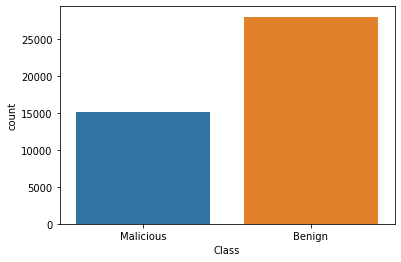

In [ ]:
sns.countplot(data=df, x="Class");

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class']) 

In [ ]:
df['Class'].unique()

array([1, 0])

In [ ]:
array = df.values

X = array[0:,0:39]
Y = array[:,39]
# Y=Y.astype('int')

In [ ]:
print("X rows: " , X)
print("Y rows: " , Y)

X rows:  [[1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]]
Y rows:  [1 1 1 ... 1 1 1]


In [ ]:
print(X.dtype)
print(Y.dtype)

int64
int64


In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_scores = MIC(X,Y)
print(mi_scores)
mi_scores.size

[0.23561067 0.23226006 0.37390758 0.00483891 0.0607995  0.
 0.00877001 0.07182315 0.         0.         0.01644817 0.00838934
 0.03011169 0.00970733 0.00504397 0.         0.07676362 0.00438863
 0.22929617 0.02683206 0.00846539 0.00711203 0.00128045 0.06851631
 0.12230218 0.12170931 0.00205411 0.06463948 0.04130543 0.00617326
 0.04309279 0.02525117 0.07763246 0.00138131 0.00451019 0.00537108
 0.00131965 0.05782454 0.04183707]


39

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC()))
models.append(('K-nearest Neighbors', KNeighborsClassifier()))

In [ ]:
from sklearn.preprocessing import LabelBinarizer

results = []
metrics = ['accuracy', 'precision', 'recall', 'f1']
lb = LabelBinarizer()
y_train = np.array([number[0] for number in lb.fit_transform(Y)])

for name, model in models:
  print(name)
  for metric in metrics:
    metricValue = model_selection.cross_val_score(model, X, y_train, cv=10, scoring=metric)
    print(metric, ": ", np.mean(metricValue))
    results.append(metricValue)

Logistic Regression
accuracy :  0.9685030362463657
precision :  0.9626027084859986
recall :  0.9666620889301611
f1 :  0.9601409713568272
Linear Discriminant Analysis
accuracy :  0.9572100182047342
precision :  0.960647459773438
recall :  0.9354996054427106
f1 :  0.9434749872074173
Decision Tree
accuracy :  0.9617915036934759
precision :  0.9513424714109033
recall :  0.9758402762337
f1 :  0.9565107351644275
Naive Bayes
accuracy :  0.9347166603785244
precision :  0.9251415640927201
recall :  0.9382069660070366
f1 :  0.922659140201876
Support Vector Machine
accuracy :  0.9629022505694937
precision :  0.9509434202994601
recall :  0.9829689455074966
f1 :  0.9596019739497204
K-nearest Neighbors
accuracy :  0.9659570454377271
precision :  0.9561651889790241
recall :  0.9776213209167679
f1 :  0.9606544399603182


In [ ]:
# to plot
values = []
names = ['LR', 'LDA', 'CART', 'NB', 'SVM', 'kNN']
for name, model in models:
  print(name)
  metricValue = model_selection.cross_val_score(model, X, y_train, cv=10, scoring='recall')
  print(metric, ": ", np.mean(metricValue))
  values.append(metricValue)

Logistic Regression
f1 :  0.9666620889301611
Linear Discriminant Analysis
f1 :  0.9354996054427106
Decision Tree
f1 :  0.9758407122086051
Naive Bayes
f1 :  0.9382069660070366
Support Vector Machine
f1 :  0.9829689455074966
K-nearest Neighbors
f1 :  0.9776213209167679


[0.98877888 0.98085809 0.99669967 0.99867987 0.99537954 0.98481848
 0.95973597 0.8310231  0.98414795 0.94649934]


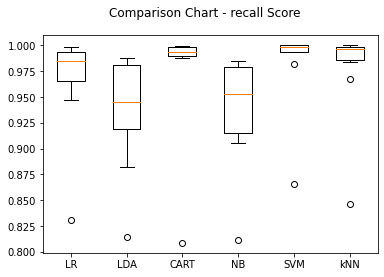

In [ ]:
fig = plt.figure()
fig.suptitle('Comparison Chart - recall Score')
ax = fig.add_subplot(111)
plt.boxplot(values)
# lr - acc, prec, recall, f1
print(values[0])
# print(values)
ax.set_xticklabels(names)
plt.show()

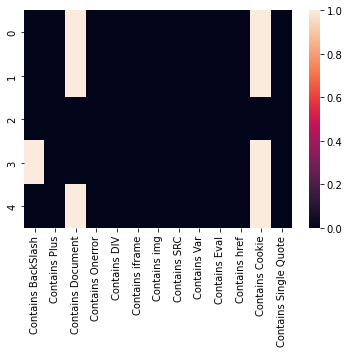

In [ ]:
sampledf = df[['Contains BackSlash', 'Contains Plus',
       'Contains Document', 'Contains Onerror', 'Contains DIV',
       'Contains iframe', 'Contains img', 'Contains SRC', 'Contains Var',
       'Contains Eval', 'Contains href', 'Contains Cookie',
       'Contains Single Quote']]
sns.heatmap(sampledf.head());